<center><h1>The Centroid and PCA Method Applied to Digit Recognition</h1></center>
<center><h2>Quan Li<h2></center>

<p>Although many classification algorithms for handwriting digit recognition have been around for a long time, the centroid and principal component analysis algorithms are two basic, simple, and well-known. The centroid algorithm provides a very simple approach to classifying digits, and the PCA method is a way to classify digits that relies on using the singular value decomposition(SVD) to compute defining characteristics. We will examine these two algorithms’ efficiency because algorithm efficiency is a very important property of an algorithm. We will present the centroid and PCA algorithms’ accuracy and performance in handwriting digit recognition on the most famous MNIST database of handwritten digits. We not only consider raw accuracy but also training time and recognition time.</p>

<p>The database used to train and test the algorithms in this paper was the famous MNIST database of handwritten digits which is a subset of a lager set available from NIST. The MNIST database of handwritten digits has a set of 60000 examples which are stored in matrix named train 0-9, and a test set of 10000 examples which are stored in matrix named test 0-9. The digits have been size-normalized and centered to fit in a 28*28 pixel box. Now, we improt the database "mnistdata.mat".</p>

In [1]:
import scipy.io
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.style.use("ggplot")
%matplotlib inline
mat = scipy.io.loadmat('mnistdata.mat')

First, Let us check one of the images in the database to see what it looks like. Then, we will introduce the algorithm.

In [2]:
Image.fromarray(np.uint8(np.reshape(mat['train9'][1,:],(28,28))))

<b>Centroid method</b><br>
<p>
<b>Training:</b><br> 
Given the manually classiﬁed training set, compute the means (centroids)  of all the 10 digits.
</p>
<p>
for i=1 to 10
<pre>T(i,:) = mean(train(i))</pre>
end
</p>

In [3]:
centroid_time=[]
T=[]
#traning
start_time = time.time()
for i in xrange(10):
    T.append((np.mean(mat["train"+str(i)],axis=0)).tolist())
centroid_time.append(time.time() - start_time)

<b>Test:</b><br> 
<p>For each digit in the test set, compute its norm in all 10 bases, classify it as I-1 if distance(k) is the closest mean.</p>

<p>
for k=1 to 10
<pre>distance[k] = norm( z - T[k] );</pre>
end<br>
<br>
I=argmin(distance);
</p>

In [4]:
def centroid_method(A,T):
    """
    INPUT: A(a n-by-784 test array/images), 
           T(a 10-by-784 array T, where i-th row contains the average of (i-1)-th training digit)
    OUTPUT: an n-by-1 vector containing the results of the classification (0-9) for the test images.
    """
    m=A.shape[0]
    v = []
    for i in xrange(m):
        z = A[i,:].astype(float)
        dist = []
        for k in xrange(10):
            dist.append(np.linalg.norm(z-T[k]))
        min_index=np.argmin(dist)
        v.append(min_index)
    return v

In [5]:
result1=[]
#testing
start_time = time.time()
for i in xrange(10):
    A=mat["test"+str(i)]
    v=centroid_method(A,T)
    result1.append(float(v.count(i))/float(A.shape[0]))
centroid_time.append(time.time() - start_time)

<b>PCA method</b><br>

<p><b>Training:</b><br> For the training set of known digits, compute the SVD of each set of digits of one kind. Compute SVDs of 10 matrices of dimension . Each digit is an m × m digitized image. : the number of training digits i.</p>

<p>
for i=0 to 9
<pre>u, d, vt = svd(train(i).T );
T(:,:,k)=u[:, :basis_len];</pre>
end
</p>


In [6]:
PCA_time=[]
basis_len = 5
T=np.empty((28*28,basis_len,10))
#traning
start_time = time.time()
for i in xrange(10):
    A = mat["train"+str(i)]
    u, d, vt = np.linalg.svd(A.T)
    T[:,:,i]=u[:, :basis_len]
PCA_time.append(time.time() - start_time)

<p><b>Test:</b><br>
For a given test digit z, compute its relative residual in all 10 bases, classify it as I-1 if distance(k) is the smallest relative residual.</p>

<p>for i=0 to 9
<pre>Ti = T(:,:,i);
distance(k) = norm( z - Ti*(Ti.T*z));</pre>
end<br>
I=argmin(distance);
</p>

In [7]:
def PCA_method(A,T):
    """
    INPUT: A(a n-by-784 test array/images), 
           T(a 784-by-n-by-10 array U, where U(:,:,i) contains 
             the first n singular vectors of the (i-1)-th training digit)
    OUTPUT: an n-by-1 vector containing the results of the classification (0-9) for the test images.
    """
    m=A.shape[0]
    v = []
    for i in xrange(m):
        z = np.mat(A[i,:]).astype(float).T
        dist = []
        for k in xrange(10):
            Uk = T[:,:,k]
            dist.append(np.linalg.norm((z-Uk*(Uk.T*z))))
        min_index=np.argmin(dist)
        v.append(min_index)
    return v

In [8]:
#Test
result2=[]
start_time = time.time()
for i in xrange(10):
    A=mat["test"+str(i)]
    v=PCA_method(A,T)
    result2.append(float(v.count(i))/float(A.shape[0]))
PCA_time.append(time.time() - start_time)

Now, we compare the accuracy rate and time cost by ploting

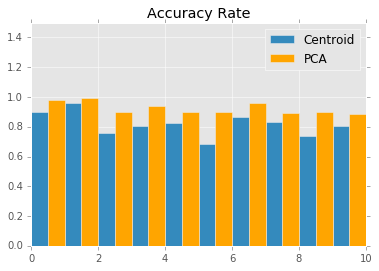

In [9]:
ind = np.arange(10)
width = 0.5 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,1.5)
rects1=ax.bar(ind, result1,width)
rects2=ax.bar(ind+width, result2,width,color='orange')
ax.set_title("Accuracy Rate")
ax.legend( (rects1[0], rects2[0]), ('Centroid', 'PCA') )
plt.show()

According to the accuracy rate plot showed above, the centroid algorithm performed worst on digit 5, and the PCA algorithm presented different accuracy rate on same digit when the approximate lengths are different. However, for every single digit, the PCA algorithm performed better than the centroid algorithm. Moreover, as the centroid algorithm present accuracy rate on digit 1, we get that the centroid algorithm works well on simple pattern.

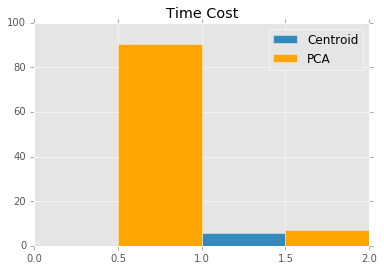

In [10]:
ind = np.arange(2)
width = 0.5 
fig = plt.figure()
ax = fig.add_subplot(111)
rects1=ax.bar(ind, centroid_time,width)
rects2=ax.bar(ind+width, PCA_time,width,color='orange')
ax.set_title("Time Cost")
ax.legend( (rects1[0], rects2[0]), ('Centroid', 'PCA') )
plt.show()

The above time cost plot shows the training and testing time for the centroid method and PCA method. The centroid method used much less time than the PCA method. Moreover, the training time cost of the PCA method is relatively high.

The average of accuracy rate is shown as below.

In [11]:
print  "The centroid method: ", np.mean(result1)
print  "The PCA method:      ",np.mean(result2)

The centroid method:  0.817256795994
The PCA method:       0.925473726345


<b>Conclusion</b>
<br><br>
Although the accuracy rate of the centroid method is low, the performance is good. The total time cost for training and testing is 0.7155, so when the performance is most matters, we can consider the centroid method.

The PCA algorithm provide a way for how to reduce a large and complex data set to a lower dimension meanwhile keep the largest eigenvalues. The efficiency of the PCA algorithm can be adjust by increasing or decreasing the approximate length. When the approximate length is around 25, the PCA algorithm has the best efficiency. 

In conclusion, the PCA algorithm requires more considerable training and testing time for low error rate. The centroid method run much faster, but the error rate is relative high.

In this paper, we only compare two method of pattern recognition. However, nowadays, there many others good efficiency algorithms, such as LeNet, KNN, and soft margin. We can continue study these algorithms and find out more keys that effect pattern recognition efficiency.  This will be import information for us, when we face plenty of data and need to choose an efficiency algorithm.

<b>Reference</b>
<br>

Chapra, S. C. (2008). Applied numerical methods with MATLAB for engineers and scientists. Boston: McGraw-Hill Higher Education.

Eldén, L. Matrix methods in data mining and pattern recognition. Philadelphia,PA: Society for Industrial and Applied Mathematics, 2007. Print.